# Double 7's (Short Term Trading Strategies that Work)

    1. The Security is above its 200-day moving average or X-day ma
    2. The Security closes at a 7-day low, buy.
    3. If the Security closes at a 7-day high, sell your long position.

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots.
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
#symbol = 'OIH'
#symbol = 'NLY'

capital = 10000
#start = datetime.datetime(2015, 1, 1)
start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

Run Strategy

In [4]:
# options = {
#     'use_adj' : False,
#     'use_cache' : True,
#     'stop_loss_pct' : 0.15,
#     'margin' : 2.0,
#     'period' : 7,
#     'sma' : 70,
#     'use_regime_filter' : True
# }

options = {
    'use_adj' : False,
    'use_cache' : True,
    'stop_loss_pct' : 0.15,
    'margin' : 2,
    'period' : 7,
    'sma' : 70,
    'use_regime_filter' : True
}

s = strategy.Strategy(symbol, capital, start, end, options)
s.run()

View logs

In [5]:
s.tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
322,2024-03-15,509.83,2024-03-20,520.48,10.65,35581.63,3341,877425.65,LONG,SPY
323,2024-04-04,513.07,2024-04-23,505.65,-7.42,-25665.83,3459,851759.82,LONG,SPY
324,2024-05-01,500.35,2024-05-03,511.29,10.94,37677.37,3444,889437.19,LONG,SPY
325,2024-05-23,525.96,2024-06-05,534.67,8.71,29788.07,3420,919225.26,LONG,SPY
326,2024-07-18,552.66,2024-08-12,533.27,-19.39,-65189.02,3362,854036.23,LONG,SPY


In [6]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2024-08-14,864036.23,864036.23,864036.23,0,864036.23,1.00,-
2024-08-15,864036.23,864036.23,864036.23,0,864036.23,1.00,-
2024-08-16,864036.23,864036.23,864036.23,0,864036.23,1.00,-
2024-08-19,864036.23,864036.23,864036.23,0,864036.23,1.00,-
2024-08-20,864036.23,864036.23,864036.23,0,864036.23,1.00,-


Generate strategy stats - display all available stats

In [7]:
pf.print_full(s.stats)

start                                                  1993-11-11
end                                                    2024-08-20
beginning_balance                                           10000
ending_balance                                          864036.23
total_net_profit                                        854036.23
gross_profit                                           1978206.47
gross_loss                                            -1124170.24
profit_factor                                                1.76
return_on_initial_capital                                 8540.36
annual_return_rate                                          15.59
trading_period                           30 years 9 months 9 days
pct_time_in_market                                          32.01
margin                                                          2
avg_leverage                                                 1.33
max_leverage                                                 2.39
min_levera

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [8]:
benchmark = pf.Benchmark(symbol, capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

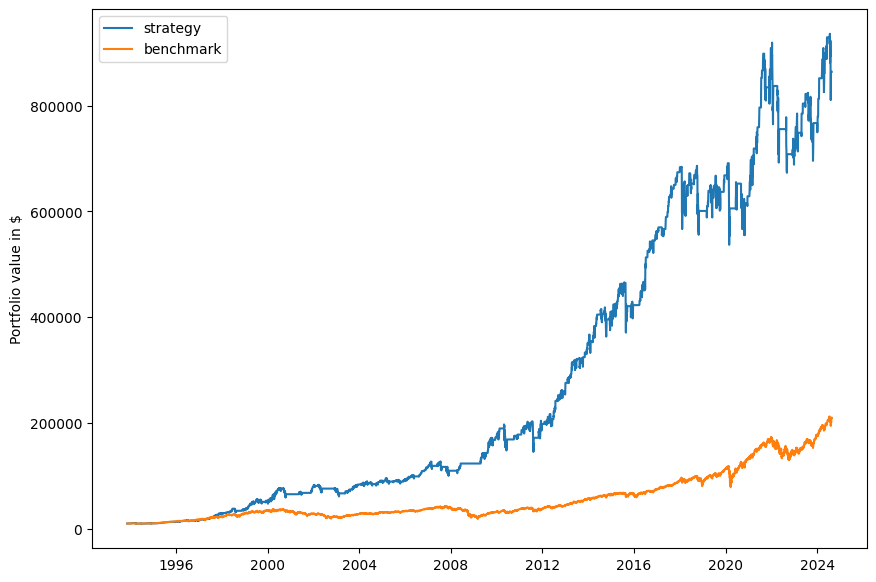

In [9]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Plot Trades

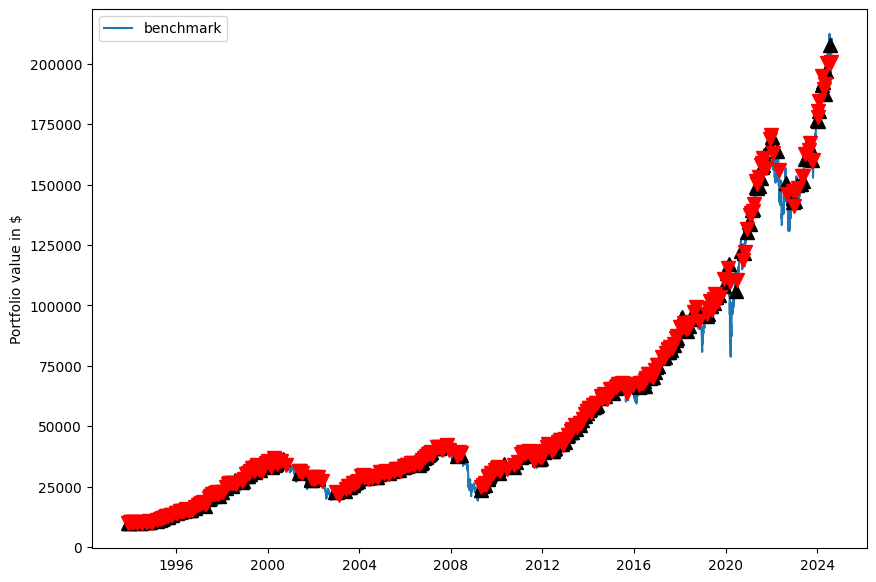

In [10]:
pf.plot_trades(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,15.59,10.40
max_closed_out_drawdown,-28.09,-55.16
annualized_return_over_max_drawdown,0.56,0.19
best_month,28.01,23.59
worst_month,-27.26,-30.98
sharpe_ratio,0.79,0.62
sortino_ratio,0.62,0.79
monthly_std,4.53,4.50
annual_std,19.25,17.15


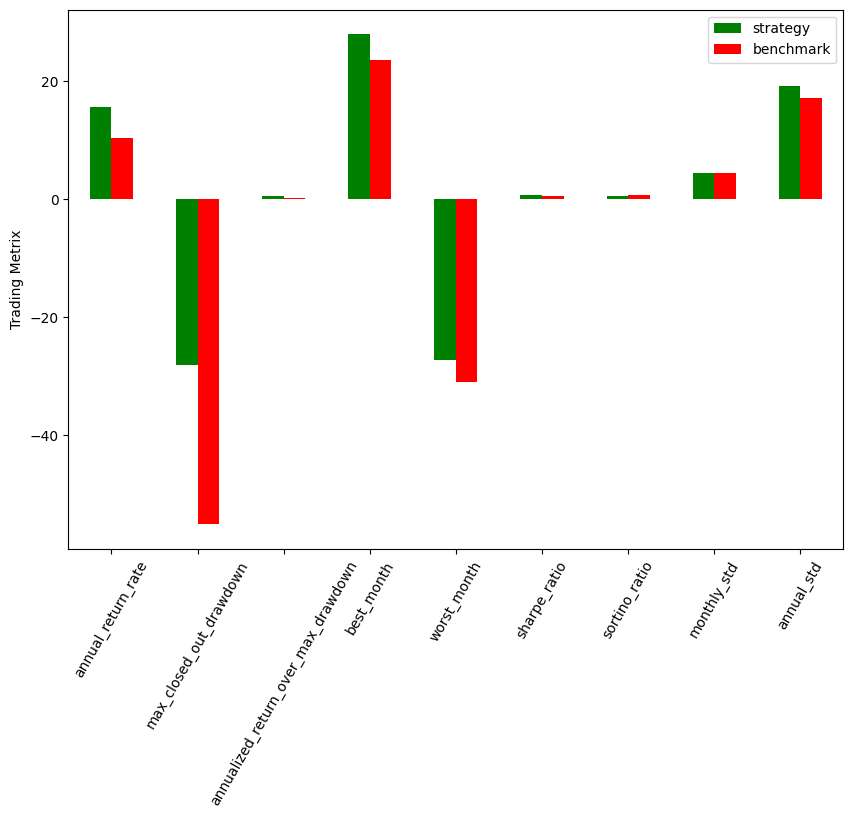

In [11]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Plot Instrument Risk vs Strategy Risk

,SPY,Strategy
avg,0.16,0.15
median,0.13,0.14
min,0.03,0.00
max,0.96,0.96
std,0.11,0.14
last,0.22,0.41


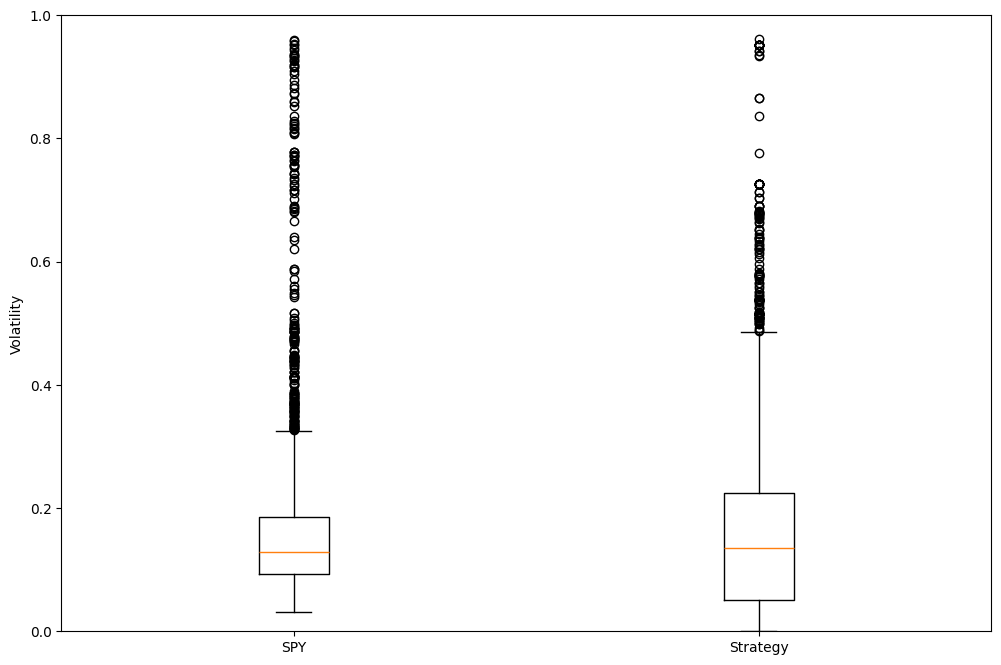

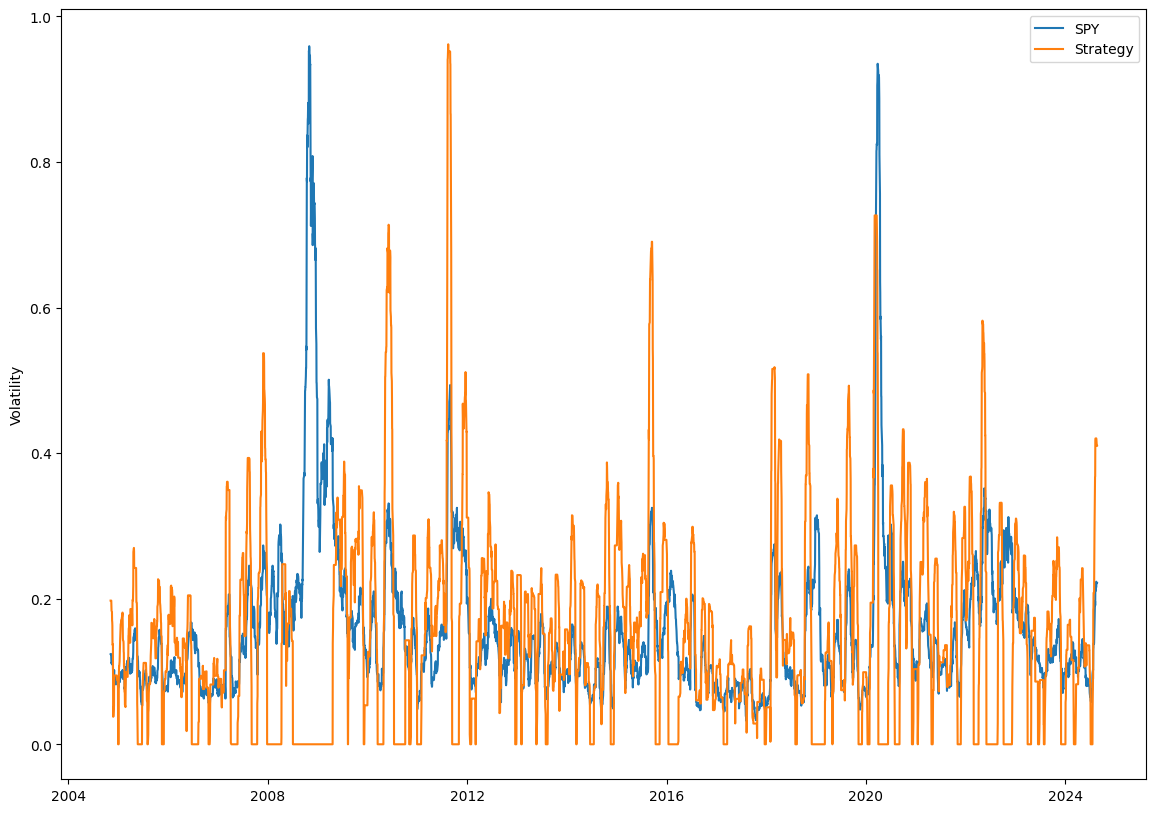

In [12]:
df = pf.volatility_graphs([s.ts, s.dbal], [symbol, 'Strategy'], points_to_plot=5000)
df

Prettier Graphs

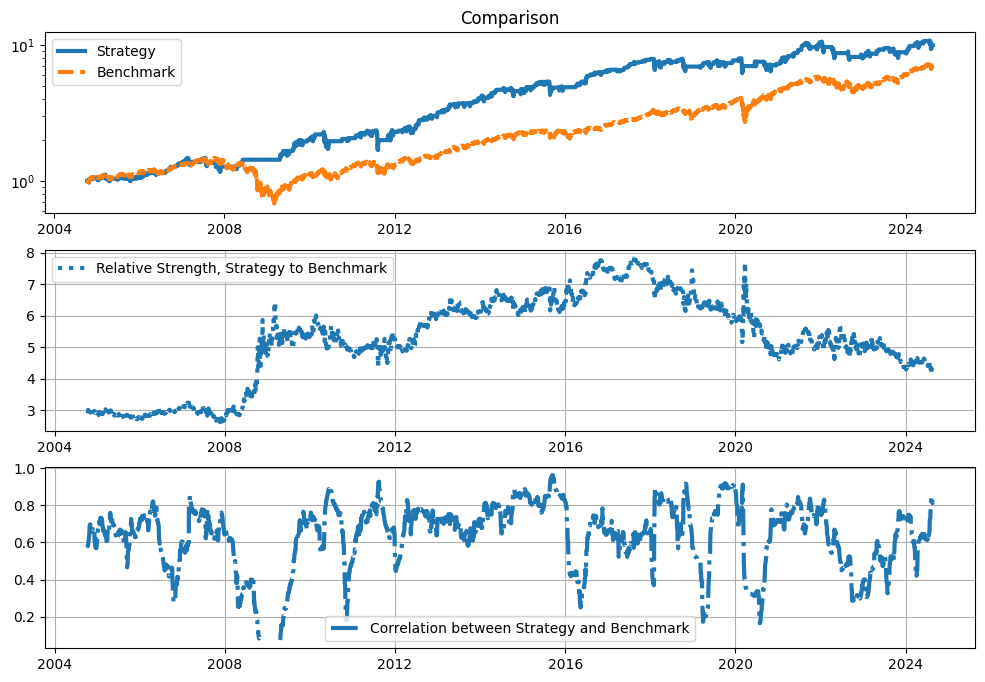

In [13]:
returns = s.dbal['close']
benchmark_returns = benchmark.dbal['close']
pf.prettier_graphs(returns, benchmark_returns, dbal_label='Strategy', benchmark_label='Benchmark', points_to_plot=5000)

In [14]:
pf.kelly_criterion(s.stats, benchmark.stats)

sharpe_ratio            0.79
sharpe_ratio_max        0.83
sharpe_ratio_min        0.75
strategy risk           0.19
instrument risk         0.17
optimal target risk     0.79
half kelly criterion    0.39
aggressive leverage     4.59
moderate leverage       2.30
conservative leverage   2.18
dtype: float64